In [5]:
import requests
from bs4 import BeautifulSoup
import pymysql
from  selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time as time
import getpass
import urllib.request
import random
import re
 
from time import sleep
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
# 게시물 크롤링
options = webdriver.ChromeOptions()
driver = webdriver.Chrome(executable_path="driver/chromedriver.exe", options = options)
options.add_argument('user-agent=Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.159 Safari/537.36')  # user-agent 
driver.get("https://www.instagram.com/accounts/login/")
driver.maximize_window()
time.sleep(1)
driver.find_element_by_xpath('//*[@id="loginForm"]/div/div[5]/button/span[2]').click()
driver.execute_script('document.getElementsByName("email")[0].value = "piwjs@naver.com"')
driver.execute_script('document.getElementsByName("pass")[0].value = "akftnr99!"')
time.sleep(1)
driver.find_element_by_xpath('//*[@id="loginbutton"]').click()
time.sleep(10)
driver.find_element_by_xpath('/html/body/div[5]/div/div/div/div[3]/button[2]').click()

# keyword = "바캉스"
# count = 1000
# url = "https://www.instagram.com/explore/tags/{}/".format(keyword)

def insta_searching(word):
    url = "https://www.instagram.com/explore/tags/" + word
    return url

word = "충남여행"
url = insta_searching(word)
driver.get(url)
time.sleep(8)

def select_first(driver):
    first = driver.find_element_by_css_selector("div.eLAPa")
    first.click()
    time.sleep(8)
    
select_first(driver)

def get_content(driver):
    
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')
    # 본문 내용 
    try:
        content = soup.select('div.C4VMK > span')[0].text
    except:
        content = ' '
    # 해시태그 
    tags = re.findall(r'#[^\s#,\\]+', content)  
    # 작성일자 
    date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]
    # 좋아요 
    try:
        like = soup.select('div.Nm9Fw > button')[0].text[4:-1]   
    except:
        like = 0
    # 위치
    try: 
        place = soup.select('div.M30cS')[0].text
    except:
        place = ''
   
    data = [content, date, like, place, tags]
    return data

get_content(driver)





['.캠핑에서만 느낄 수 있는 분위기@@조금 귀찮아도 찐힐링이야...짜릿해...💚⠀#충남어디까지가봤니 #충남여행 #국내여행#해오름관광농원 #진달래관광농원 #용두캠핑장#프린세스캠핑장 #인삼골오토캠핑장 #몽산포오토캠핑장#고목정 #파인힐캠프 #캠핑장추천 #소통',
 '2021-08-13',
 0,
 '',
 ['#충남어디까지가봤니',
  '#충남여행',
  '#국내여행',
  '#해오름관광농원',
  '#진달래관광농원',
  '#용두캠핑장',
  '#프린세스캠핑장',
  '#인삼골오토캠핑장',
  '#몽산포오토캠핑장',
  '#고목정',
  '#파인힐캠프',
  '#캠핑장추천',
  '#소통']]

In [12]:
# 다음페이지
def move_next(driver):

    right = driver.find_element_by_css_selector ('a.coreSpriteRightPaginationArrow')
    right.click()
    time.sleep(8)

move_next(driver)

In [15]:
# 크롤링 시작

word = "충남여행" 
url = insta_searching(word)

driver.get(url)
time.sleep(6)

select_first(driver)

results = [ ]

# 크롤링 할 페이지 개수
target = 10
for i in range(target):
    
    try:
        data = get_content(driver)  
        results.append(data)
        move_next(driver)
    except:
        time.sleep(2)
        move_next(driver)
    

print(results[:2])

# 크롤링 결과 데이터 칼럼 설정 후 저장 (csv, json, excel)

results_df = pd.DataFrame(results)
results_df.columns = ['content','data','like','place','tags']
results_df.to_csv('C:/Users/piwjs/Python Project/Python-tour/csv/Insta_충남관광.csv',encoding='utf-8-sig')
# results_df.to_json('C:/Users/piwjs/Python Project/Python-tour/csv/충남2.json')
# results_df.to_excel('C:/Users/piwjs/Python Project/Python-tour/csv/충남관광.xlsx')
results_df

[['배롱나무 꽃이 이쁘게 피었어요!꽃들도 바닥에 깔려서 더욱 이쁜것 같아요😊이곳은 서산 운산에 위치한 문수사 입니다.작은 절이지만 마당 가운데에 배롱나무가 심어져있어 더 멋진곳 같아요☺...📸#A7M3+A2470📍#문수사', '2021-08-12', 0, 'Seosan', ['#A7M3+A2470📍', '#문수사']], ["[ 빙글 빙글 동화 속에 나올 만한 공간 아닌가요 - ? 🌈🎡]계절마다 달라지는 논뷰를 가진이곳은 #당진 #삽교호놀이동산 입니다 - !⠀📍 삽교호 놀이동산-충남 당진시 신평면 삽교천3길 15⠀논뷰라서 그런지 논이 계절에 따라대관람차의 뷰의 느낌이달라진다고 합니당⠀최근엔 드라마 '알고있지만' 촬영지로도 유명한 곳 - 💜⠀밤이 되면대관람차에 불도 들어와서더 웅장해보이죠 ?⠀동화 속에나 나올 만한 풍경⠀포토존에서 사진도 찍고노을 질 때쯤엔대관람차도 타보면서예쁜 노을 보러 가보쟈요 ✨⠀📸대관람차 포토스팟 가는 법 -충남 당진시 신평면 삽교천2길 14찍고 가시면 됩니당 - !⠀📍운영시간월~일요일 10:0 - 22:00 / 토요일 11:00 -23:00⠀📍입장료대관람차 - 6,000원 / 1기종당 - 5,000원 (대인기준)⠀💌@sophie_phj 님의 여행일기장⠀⠀#여행다녀왔습니다 로 남기는 우리들의 여행일기장⠀⠀⠀⠀⠀----------------------------------나의 여행을 제보하고 싶다면? >> 프로필링크 그룹으로!나의 여행 사진에 #여행다녀왔습니다 태그✨여행다녀왔습니다 에디터가 찾아갑니다✨----------------------------------⠀⠀⠀⠀⠀📢 지금 대한민국은 수도권 기준 [사회적 거리두기 4단계]여행시 방역수칙을 준수하고, 야외 활동시 마스크 착용은 필수!⠀#여행다녀왔습니다_국내 #여행다녀왔습니다_당진 #travelmenu1⠀⠀-⠀#충남 #충남여행 #충남여행추천 #당진 #당진여행 #당진여행추천 #논뷰 #당진여행코스 #당진여행코스추천 #당진삽교호놀이공원 #삽교호놀이공원 #삽교호놀이동산 ##포토스팟 #대관람차 #국

,content,data,like,place,tags
0,배롱나무 꽃이 이쁘게 피었어요!꽃들도 바닥에 깔려서 더욱 이쁜것 같아요😊이곳은 서산...,2021-08-12,0,Seosan,"[#A7M3+A2470📍, #문수사]"
1,[ 빙글 빙글 동화 속에 나올 만한 공간 아닌가요 - ? 🌈🎡]계절마다 달라지는 논...,2021-08-18,0,삽교호놀이동산,"[#당진, #삽교호놀이동산, #여행다녀왔습니다, #여행다녀왔습니다, #여행다녀왔습니..."
2,_가벼운 외출복으로도 홈웨어로도 손색이 없었던 이지룩세트🤍본 제품은 @sloppy_...,2021-07-28,0,파도리해수욕장,[]
3,지구별 세상에서 만난 우주정거장🚍중력을 버틸 수만 있다면차 안에도 들어갈 수 있어요...,2021-08-16,0,지구별,"[#지구별그림책마을, #금산, #금산가볼만한곳, #대전근교, #충남여행, #충북여행..."
4,⠀흩날리는 꽃들 속에서🎵 ⠀여름 바캉스를 즐길 수 있는 #국립세종수목원 ⠀⠀라탄 소...,2021-07-28,0,,"[#국립세종수목원, #충북여행, #여기서행복할것, #여기서행복할것_세종⠀, #여기서..."
5,내친구 해바라기씨🌻선글라스 씌우니 넘 멋지잖아?🌻,2021-08-09,0,공주 미르섬,[]
6,배 타고 들어가야 나오는 신비한 식당🛶영업한지 50년이 다되어 가는 찐 맛집이에요농...,2021-08-15,0,쥐꼬리명당식당,[]
7,여기 한국 맞아?넓은 들판에 쭉 벋은 도로전봇대가 없으니 이렇게 깔끔할 수가💚모든 ...,2021-08-09,0,Seosan,"[#서위스, #서에이사람, #서산목장, #비에이, #스위스, #서산여행, #대한민국..."
8,.@호텔+리조트+펜션으로 룸캉스가자~🏨🏘🏩숙소에서 룸콕하는 여름휴가#충남어디까지가봤...,2021-08-05,0,,"[#충남어디까지가봤니, #충남여행, #충청남도, #국내여행, #서산, #보령, #부..."
9,#repost @bandimarket20 @repost.user🎉제2회 무주반딧불시...,2021-08-26,0,,"[#repost, #무주반딧불시장, #농특산물특화장터, #무주여행, #무주가볼만한곳..."


In [16]:
# 년도별, 월별 데이터를 가져오기 위한 칼럼 설정

import pandas as pd
import re
from datetime import datetime   # 패키지 - 모듈 (이름 같음)
import pandas as pd   # csv file read
import matplotlib.pyplot as plt   # 시계열 시각화

df = pd.read_csv('C:/Users/piwjs/Python Project/Python-tour/csv/충남관광.csv')
df['date2'] = pd.to_datetime(df['data'])
df['year'] = df['date2'].dt.year
df['month'] = df['date2'].dt.month
df

,Unnamed: 0,content,data,like,place,tags,date2,year,month
0,0,"""인주""세대를 아우르는 한옥의 아름다움어진 고을의 뜻을 가진 인주면에웅장한 한옥 공...",2021-05-24,0.0,충남 아산,['#공간노트'],2021-05-24,2021,5
1,1,"⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀너의 입장에서 생각해 볼게,그럼 열리지 않을까-⠀⠀⠀⠀⠀⠀...",2021-05-27,0.0,Seosan,"['#충남여행', '#서산여행', '#봄', '#여름']",2021-05-27,2021,5
2,2,"✅ #공주_한적한가..작은 도심속 한적함을 누릴 수 있는 ""한적한가"" 추억이 가득한...",2021-06-04,0.0,충남 공주시,"['#공주_한적한가..작은', '#감성숙소_공주✔', '#감성숙소_충청남도..', ...",2021-06-04,2021,6
3,3,사랑나무💛⠀동화같은 나무 아래에서예쁜 노을이 펼쳐지던 곳🌈⠀하트 반쪽짜리 나무를 찍...,2021-06-08,0.0,성흥산성 사랑나무,[],2021-06-08,2021,6
4,4,[EVENT] 나의 최애 충남 여행지는 어디⁉⠀충남을 여행해 봤다면 누구나 참여할 ...,2021-06-07,0.0,NaN,"['#충남어디까지가봤니', '#이벤트', '#충남여행', '#충남', '#충청남도'...",2021-06-07,2021,6
...,...,...,...,...,...,...,...,...,...
995,995,#온석커피ㆍㆍ선생님 오랜만에 만나서 즐거운 아이들❤국어사전 열심히 공부해서 다음달에...,2021-06-07,0.0,NaN,['#온석커피ㆍㆍ선생님'],2021-06-07,2021,6
996,996,"천안 구도심, 접근성이 좋은 곳에 위치한 오래된 집, 두 부부가 직접 진심담아 고안...",2021-06-07,0.0,NaN,['#공간이유'],2021-06-07,2021,6
997,997,"3분 같았던 태안 2박 3일,,:::::#힐링여행 #태안여행 #태안데이트 #충남여행...",2021-06-07,0.0,Taean,"['#힐링여행', '#태안여행', '#태안데이트', '#충남여행', '#트레블브레이...",2021-06-07,2021,6
998,998,맛있는 저녁 #회 가 좋아~,2021-06-07,0.0,NaN,['#회'],2021-06-07,2021,6


In [19]:
# 특정 칼럼 데이터를 index 칼럼으로 변환하여 데이터를 가져오기 위한 index 칼럼 추가

travel_insta_df = pd.DataFrame( [ ] )

folder = 'C:/Users/piwjs/Python Project/Python-tour/csv/'
f_list = ['충남관광.csv']
for fname in f_list:
    fpath = folder + fname
    temp = pd.read_csv(fpath)
    travel_insta_df = travel_insta_df.append(temp)

travel_insta_df.columns =['index','content','data','like','place','tags']

In [20]:
# tags 칼럼만 수집

travel_insta_df.drop_duplicates(subset = [ "tags"] , inplace = True)
travel_insta_df.to_csv('C:/Users/piwjs/Python Project/Python-tour/csv/충남관광.csv', index = False)

In [21]:
# tags pandas reading

import pandas as pd
raw_total = pd.read_csv('C:/Users/piwjs/Python Project/Python-tour/csv/충남관광.csv')
raw_total['tags']

0                                              ['#공간노트']
1                        ['#충남여행', '#서산여행', '#봄', '#여름']
2      ['#공주_한적한가..작은', '#감성숙소_공주✔', '#감성숙소_충청남도..', ...
3                                                     []
4      ['#충남어디까지가봤니', '#이벤트', '#충남여행', '#충남', '#충청남도'...
                             ...                        
610    ['#부여여행', '#부여카페', '#카페투어', '#무드빌리지', '#충남카페',...
611                                       ['#온석커피ㆍㆍ선생님']
612    ['#힐링여행', '#태안여행', '#태안데이트', '#충남여행', '#트레블브레이...
613                                               ['#회']
614                               ['#셀카샷ㆍㆍ일요일', '#어제사진']
Name: tags, Length: 615, dtype: object

In [22]:
# tags 칼럼 나열

tags_total = []

for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)
    print(tags)

['#공간노트']
['#충남여행', '#서산여행', '#봄', '#여름']
['#공주_한적한가..작은', '#감성숙소_공주✔', '#감성숙소_충청남도..', '#충청남도', '#공주', '#한적한가-', '#공주여행', '#공주펜션', '#공주숙소', '#공주독채펜션', '#충남펜션', '#충남여행', '#충남독채펜션', '#충남숙소', '#감성숙소', '#독채펜션', '#에어비앤비', '#대전근교여행', '#한적한나', '#신상펜션', '#감성펜션']
[]
['#충남어디까지가봤니', '#이벤트', '#충남여행', '#충남', '#충청남도', '#국내여행', '#설문조사']
['#1일1카페', '#카페금성동', '#공주카페', '#1일1캎', '#1일1캎_공주⠀⠀✔카페정보👉🏻']
['#충남어디까지가봤니', '#충남여행', '#충청남도', '#국내여행', '#수국스팟', '#삼선산수목원', '#팜카밀레', '#유구색동수국정원', '#당진', '#태안', '#공주', '#아미미술관', '#데이트코스', '#데이트추천', '#소통', '#좋아요']
['#선셋파머스', '#금산숙소', '#금산펜션', '#에어비엔비']
['#엔학고레']
['#빵삼킨밤']
['#20210605금욜에']
['#리그램', '#충남어디까지가봤니', '#충남여행', '#충청남도', '#국내여행', '#보령', '#죽도상화원', '#데이트코스', '#데이트추천', '#소통', '#좋아요']
['#충남여행', '#공주', '#부자떡집', '#마곡사', '#솥뚜껑매운탕', '#메기매운탕', '#옥수동카페친구']
['#20210426', '#튤립축제', '#태안여행']
['#충남여행', '#콧바람쐬러', '#충남서산', '#서산맛집', '#바닷가', '#일상', '#일상기록', '#갑작스레', '#즉흥여행', '#특전수산', '#칼국수', '#가리비찜', '#부부동반👫']
['#충남', '#충남여행', '#충남카페', '#충남카페투어', '#충남가볼만한곳', '#서산', '#서산카페', '#서산카페추

In [23]:
# counter

from collections import Counter
tag_counts = Counter(tags_total)

# 10000개
tag_counts.most_common(10000)

[('#충남여행', 381),
 ('#여행스타그램', 62),
 ('#충남', 61),
 ('#일상', 60),
 ('#여행', 59),
 ('#국내여행', 56),
 ('#서산', 44),
 ('#공주', 41),
 ('#당진', 35),
 ('#좋아요', 33),
 ('#태안', 32),
 ('#소통', 31),
 ('#가족여행', 31),
 ('#충청남도', 30),
 ('#충남가볼만한곳', 30),
 ('#당진여행', 30),
 ('#태안여행', 29),
 ('#여행에미치다', 27),
 ('#아그로랜드', 26),
 ('#daily', 25),
 ('#공주가볼만한곳', 24),
 ('#여행지추천', 23),
 ('#충남카페', 22),
 ('#보령', 21),
 ('#부여', 21),
 ('#인생샷', 21),
 ('#서산가볼만한곳', 20),
 ('#충청도여행', 20),
 ('#데일리', 19),
 ('#서산여행', 18),
 ('#공주카페', 18),
 ('#ootd', 18),
 ('#대한민국구석구석', 18),
 ('#좋반', 17),
 ('#예산', 17),
 ('#맞팔', 17),
 ('#서산카페', 16),
 ('#travel', 16),
 ('#럽스타그램', 16),
 ('#공주여행', 15),
 ('#카페스타그램', 15),
 ('#백제문화단지', 15),
 ('#부여여행', 15),
 ('#카페투어', 15),
 ('#홍성', 15),
 ('#이벤트', 14),
 ('#데이트코스', 14),
 ('#사진스타그램', 14),
 ('#팔로우', 14),
 ('#맛스타그램', 14),
 ('#포토존', 14),
 ('#태신목장', 14),
 ('#카페추천', 13),
 ('#카페', 13),
 ('#보령여행', 13),
 ('#아그로랜드태신목장', 13),
 ('#천안여행', 13),
 ('#충남어디까지가봤니', 12),
 ('#대전근교', 12),
 ('#캠핑', 12),
 ('#충남맛집', 12),
 ('#아산여행', 12),
 ('

In [24]:
# 전처리

STOPWORDS = ['', '#일상', '#아들스타그램', '#줌마그램', '#데일리그램', '#여섯살아들', '#도치맘', '#육아그램', '#소소한일상', 
            '#요리그램', '#홈쿡', '#얼집등원룩', '#뱀띠아들', '#6년차주부', '#daily', '#소통', '#데일리', '#2019', '#맞팔',
            '#korea', '#2020', '#좋아요', '#koreatravel', '#photography', '#소니이미지갤러리', '#snap','#육아스타그램',
            '#southkorea', '#선팔', '#2018', '#fff', '#셀스타그램', '#좋아요반사', '#ig_korea' ,'#주말일상','#딸스타그램','#스히',
            '#sony','#팔로우','#selfie', '#대한민국', '#셀카','#a7m3','#육아소통','#사랑해','#기록','#scenery','#스냅','#today',
            '#대구맘','#선팔하면맞팔','#lance_rover','#lance','#lance865','#lancetruckcamper','#truckcamper','#truckcamperlife',
            '#모터홈라이프','#motorhomelife','#알빙','#arving','#sel2470gm','#beautifuldestinations','#소통해요','#ootd','#selca', 
            '#f4f','#인친','#아들','#2015','#문경시SNS서포터즈','#igtravel','#가산수피아','#2017','#visitkorea','#instagramer',
             '#꽃비원라이프','#사춘기메들리','#Repost','#더정성스냅','#SonyImageGallery','#iphone8','#셀피','#육아맘','#백현그램',
             '#데일리룩','#igdaily','#2014','#a7ii','#selfi','#pet','#sonyphotography','#good', '#멍스타그램','#ig_asia','#좋아요',
             '#koreabyme','#dailylook','#해시태그','#오늘','#캐논이미지스토밍','#ig_color','#instadaily','#temple','#점심','#닭띠아기',
             '#예쁜아기','#귀여워','#부산사진동호회여담','#instagood','#goout','#gooutside','#꼬꼬마부부','#exploringKorea','#environment',
             '#유기견','#고령강아지', '#고령유기견','#고령요크셔테리어','#고령유기동물','#요크셔테리어','#다음은어디','#가보고싶은곳밀',
             '#sunset','#굿모닝','#2016','#2012','#ig_photo','#후추동반여행','#아들맘','#딸맘','#southkoreatrip','#southkoreatravel',
             '#2020특별여행주간','#여름원피스','#❤️','#육아소통','#travelkorea','#traveller','#리틀포레스트','#koreanlife','#likeforlikes',
             '#longexposure','#사랑','#대환투어','#대환투어on','#대환투어는계속된다','#아기일상','#baby','#cutebaby','#심장폭행',
             '#워킹맘','#직장인', '#베이비스타그램','#딸둘','#화이팅','#gbnadri','#durchatmen','#로랑_여행','#사진소통','#방콕','#외출',
             '#럽럽','#럽럽럽','#럽럽럽💕','#90mm', '#ig_world','#ig_koera','#pine', '#follow','#선팔하면맞팔가요', '#利潤益',
             '#gailbookshelf','#writeaboutmyself','#naturaldyescarf','#내고장알리미연합회','#오오티디','#following','#follower',
             '#follow4like','#likeforfollow','#안녕경주야','#portrait','#kinfolklife','#후추','#엄마와아들',
            '#충남명소','#충남여행','#충남가볼만한곳','#충남맛집','#충남데이트','#충남관광','#충남어디까지가봤니','#충남','#도민리포터',
            '#충청남도','#충남관광','#충청남도','#여행스타그램','#충남여행']

In [25]:
# 전처리 후 데이터

tag_total_selected = []

for tag in tags_total:
    if tag not in STOPWORDS:
        tag_total_selected.append(tag)
        
# 상위 100개 단어 추출하기        
tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected.most_common(100)

[('#여행', 59),
 ('#국내여행', 56),
 ('#서산', 44),
 ('#공주', 41),
 ('#당진', 35),
 ('#태안', 32),
 ('#가족여행', 31),
 ('#당진여행', 30),
 ('#태안여행', 29),
 ('#여행에미치다', 27),
 ('#아그로랜드', 26),
 ('#공주가볼만한곳', 24),
 ('#여행지추천', 23),
 ('#충남카페', 22),
 ('#보령', 21),
 ('#부여', 21),
 ('#인생샷', 21),
 ('#서산가볼만한곳', 20),
 ('#충청도여행', 20),
 ('#서산여행', 18),
 ('#공주카페', 18),
 ('#대한민국구석구석', 18),
 ('#좋반', 17),
 ('#예산', 17),
 ('#서산카페', 16),
 ('#travel', 16),
 ('#럽스타그램', 16),
 ('#공주여행', 15),
 ('#카페스타그램', 15),
 ('#백제문화단지', 15),
 ('#부여여행', 15),
 ('#카페투어', 15),
 ('#홍성', 15),
 ('#이벤트', 14),
 ('#데이트코스', 14),
 ('#사진스타그램', 14),
 ('#맛스타그램', 14),
 ('#포토존', 14),
 ('#태신목장', 14),
 ('#카페추천', 13),
 ('#카페', 13),
 ('#보령여행', 13),
 ('#아그로랜드태신목장', 13),
 ('#천안여행', 13),
 ('#대전근교', 12),
 ('#캠핑', 12),
 ('#아산여행', 12),
 ('#데이트', 12),
 ('#서해바다', 12),
 ('#예산여행', 12),
 ('#여름', 11),
 ('#서산맛집', 11),
 ('#여행사진', 11),
 ('#드라이브', 11),
 ('#당진카페', 11),
 ('#당진가볼만한곳', 11),
 ('#cafe', 11),
 ('#안면도', 11),
 ('#서천여행', 11),
 ('#travelgram', 11),
 ('#힐링여행', 11),
 ('#커플여행', 11),

In [26]:
# 그래프

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import sys

In [27]:
# font 설정

if sys.platform in ['win32', 'win64']:
    font_name = 'malgun gothic'
elif sys.platform == 'darwin':
    font_name = 'AppleGothic'
    
rc('font', family = font_name)

In [28]:
# x,y 설정

tag_counts_df = pd.DataFrame(tag_counts_selected.most_common(50))
tag_counts_df.columns = ['tags', 'counts']

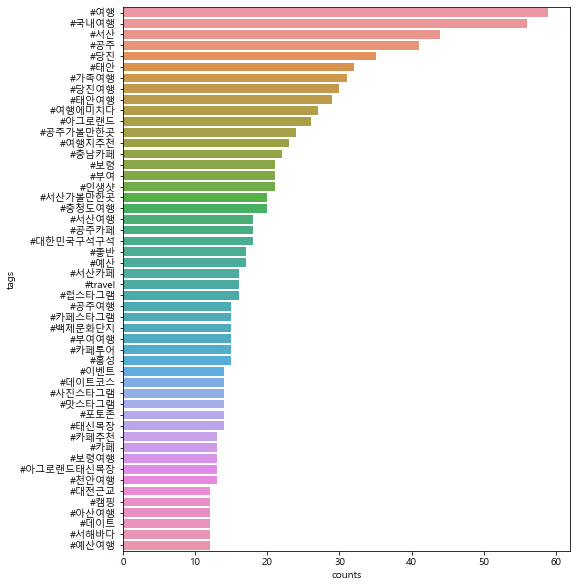

In [30]:
# 데이터 막대 그래프

plt.figure(figsize =(8,10))
sns.barplot(x = 'counts', y = 'tags', data = tag_counts_df)
plt.savefig('C:/Users/piwjs/Python Project/Python-tour/csv/충남관광2.png')  

In [31]:
# wordcloud

! pip install wordcloud

In [32]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import platform

In [33]:
if platform.system() == 'Windows':   
    font_path = "c:/Windows/Fonts/malgun.ttf"
elif platform.system() == "Darwin":  
    font_path = "/Users/$USER/Library/Fonts/AppleGothic.ttf"

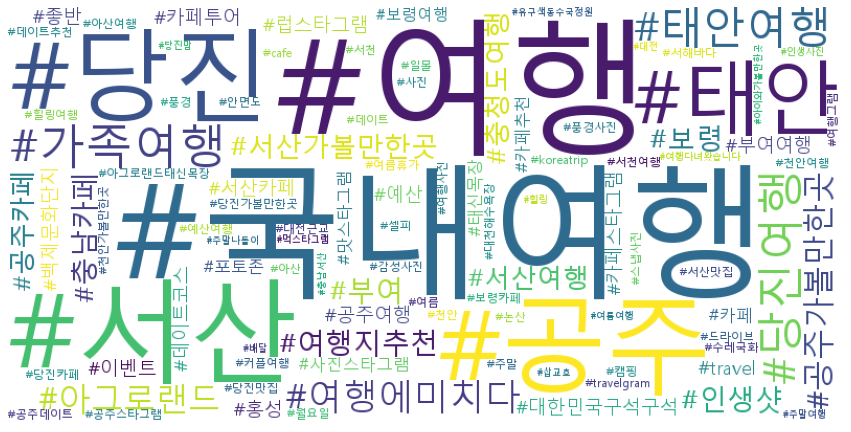

In [35]:
wordcloud=WordCloud(font_path= font_path, 
                    background_color="white",
                    max_words=100,
                    relative_scaling= 0.3,
                    width = 800,
                    height = 400
                 ).generate_from_frequencies(tag_counts_selected)  
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('C:/Users/piwjs/Python Project/Python-tour/csv/WordCloud.png')  

In [5]:
import requests
from bs4 import BeautifulSoup
import pymysql
from  selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time as time
import getpass
import urllib.request
import random
import re
import csv
 
from time import sleep
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('csv/충남2.csv')

# df.rename(columns = df.iloc[0], inplace=True)
df = df.drop(['like'], axis=1)
df = df.dropna(axis=0)
df = df.drop_duplicates(['place'])
df = df.drop_duplicates(['tags'])

df
# # df['place'] = df['place'].str.replace(pat=r'[" "]', repl=r'', regex=True)
# df1 = df['place'] == '아그로랜드 태신목장'

# df2 = df1 == True
# # df2
cnt1 = 0
cnt2 = 0
cnt3 = 0
cnt4 = 0
cnt5 = 0
cnt6 = 0
cnt7 = 0
cnt8 = 0
cnt9 = 0
cnt10 = 0
cnt11 = 0
cnt12 = 0
cnt13 = 0
cnt14 = 0
cnt15 = 0
# 서산 = 공주 > 태안 > 당진 > 예산 > 아산 = 부여 
df3 = df[df['tags'].str.contains('서산')]
# df3
df2 = []
for i in df['tags']:
    if "#천안" in i: #18
        df2.append(i)
#         print(df2)
        cnt3 += 1
    elif "#예산" in i: #9
        cnt4 += 1
    elif "#공주" in i: #18
        cnt5 += 1
    elif "#아산" in i: # 8
        cnt7 += 1
    elif "#태안" in i: # 13
        cnt9 += 1
    elif "#부여" in i: # 8
        cnt11 += 1
    elif "#당진" in i: # 11
        cnt12 += 1
        
df
# prin(cn31)
# print(cnt2)
print(cnt3)
print(cnt4)
print(cnt5)
# print(cnt6)
print(cnt7)
# print(cnt8)
print(cnt9)
# print(cnt10)
print(cnt11)
print(cnt12)
# print(cnt13)
# print(cnt14)
# print(cnt15)

    
# s = df.groupby('place')['place'].transform('size')
# print(s)
# #     if(i == '아그로랜드 태신목장'):
# #         cnt += 1
    

# print(cnt)
# df = df.drop(df.index[0])

11
9
16
3
15
9
14


In [12]:
arr = {"서산","공주","태안","당진","예산"}
arr1 = ["간월암","해미읍성","개심사"]
arr2 = ["공주한옥마을","공산성","유구색동수국공원"]
arr3 = ["꽃지해수욕장","토굴새우젓단지","안면도자연휴양림"]
arr4 = ["아그로랜드 태신목장","마섬포구","왜목마을"]
arr5 = ["추사고택","수덕사","덕산온천"]
for i in range(0,4,1):
    data = [
        {"name":arr},
        {"content":arr + str(i)}
    ]

print(data)
# collection.insert_many(data)

df = pd.DataFrame(data)
df

TypeError: unsupported operand type(s) for +: 'set' and 'str'